In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
rs_df = pd.read_csv("all_results.csv").dropna()

In [10]:
rs_df

,Type,LR,Epoch,Train loss,nDCG@10 max,nDCG@10 mean
0,fine tune from scratch,1.000000e-05,1.0,0.1699,0.5376,0.5207
1,fine tune from scratch,1.000000e-05,4.0,0.0489,0.5499,0.5291
2,fine tune from scratch,1.000000e-05,6.0,0.0426,0.5905,0.5854
3,fine tune from scratch,1.000000e-05,8.0,0.0373,0.5509,0.5355
4,fine tune from scratch,1.000000e-05,10.0,0.0295,0.5572,0.5569
5,fine tune from scratch,1.000000e-05,13.0,0.0247,0.5152,0.5123
7,MS MARCO fine tune,1.000000e-06,0.0,0.2501,0.6210,0.6148
8,MS MARCO fine tune,1.000000e-06,1.0,0.1441,0.6042,0.5881
9,MS MARCO fine tune,1.000000e-06,2.0,0.1194,0.5837,0.5775
10,MS MARCO fine tune,1.000000e-06,3.0,0.1055,0.5679,0.5716


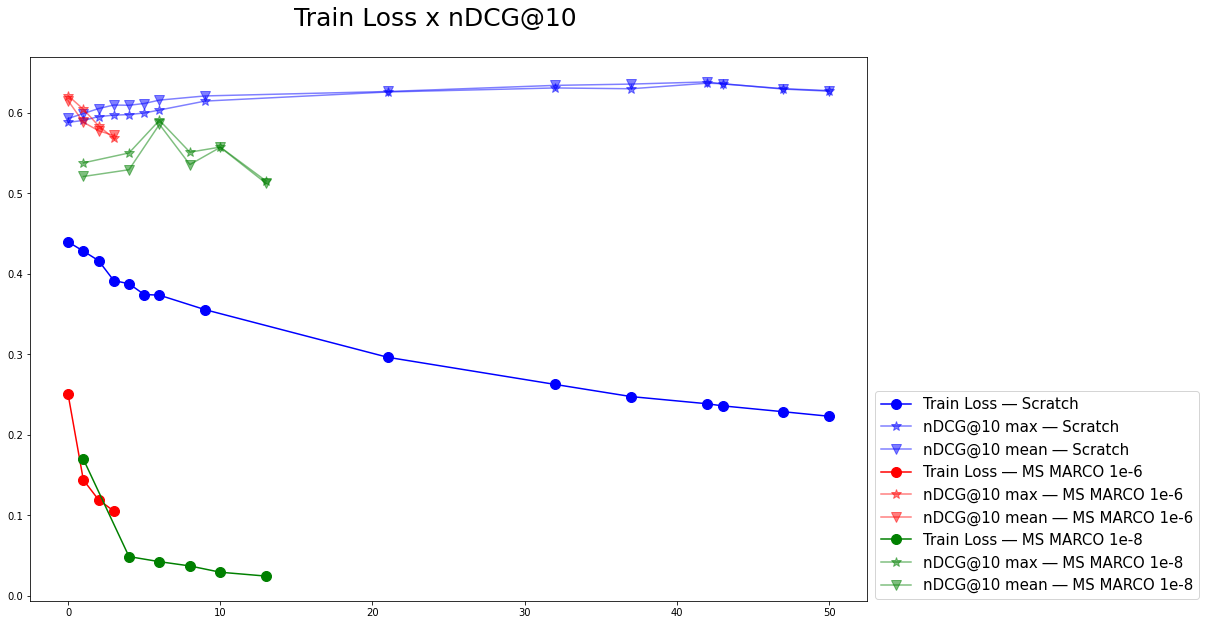

In [47]:
fig = plt.figure(figsize=[15,10])

types=['Scratch', 'MS MARCO 1e-6', 'MS MARCO 1e-8']

colors = ['blue', 'red', 'green']
color_index = 0

handles = []
labels = []

for group_name, group_df in rs_df.groupby(['Type', 'LR']):

    new_handle, = plt.plot(group_df['Epoch'], group_df['Train loss'], color=colors[color_index], marker="o", markersize=10)
    
    handles.append(new_handle)
    labels.append("{} ― {}".format("Train Loss", types[color_index]))
    
    new_handle, = plt.plot(group_df['Epoch'], group_df['nDCG@10 max'], color=colors[color_index], marker="*", markersize=10, alpha=0.5)
    handles.append(new_handle)
    labels.append("{} ― {}".format("nDCG@10 max", types[color_index]))

    new_handle, = plt.plot(group_df['Epoch'], group_df['nDCG@10 mean'], color=colors[color_index], marker="v", markersize=10, alpha=0.5)
    handles.append(new_handle)
    labels.append("{} ― {}".format("nDCG@10 mean", types[color_index]))

    color_index += 1

plt.legend(labels=labels, handles=handles, fontsize=15, bbox_to_anchor=(1.0, 0.4))

plt.suptitle("Train Loss x nDCG@10", fontsize=25, y=0.95)
    
plt.show()